# Inferência Estatística (GCC1625) - Trabalho 3
- Nome completo: ANA CAROLINA SÁ COELHO DA SILVA
- Link para o vídeo: 

# (1) Correlação e covariância

- `horas_estudo`: número de horas que o aluno estudou na semana;
- `nota_final`: nota final no curso (de 0 a 100).

Seu objetivo é investigar a relação entre essas duas variáveis. Você deve usar
 os dados simulados gerados pelo bloco de código fornecido abaixo.

```python
import numpy as np
import pandas as pd

np.random.seed(42)
horas_estudo = np.random.normal(10, 2, 30)
nota_final = 50 + 4 * horas_estudo + np.random.normal(0, 5, 30)

df = pd.DataFrame({
    'Horas de Estudo': horas_estudo,
    'Nota Final': nota_final
})



## (1.1) Cálculo Manual

1. Calcule a média de cada variável;
2. Calcule a covariância amostral usando a fórmula:

$$
\text{Cov}(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$

3. Calcule a correlação de Pearson usando a fórmula:


$$\rho(X, Y) = \frac{\text{Cov}(X, Y)}{s_X s_Y}$$


Use  as funções `np.mean()`, `np.std()` e `np.cov()` para comparar com seus resultados.


In [ ]:
import numpy as np
import pandas as pd

#simulacao de dados do enunciado
np.random.seed(42)
horas_estudo = np.random.normal(10, 2, 30)
nota_final = 50 + 4 * horas_estudo + np.random.normal(0, 5, 30)
df = pd.DataFrame({
    'Horas de Estudo': horas_estudo,
    'Nota Final': nota_final
})

n = len(horas_estudo)

#medias manuais
media_horas_manual = np.sum(horas_estudo) / n
media_nota_manual = np.sum(nota_final) / n

#dp manual
desvio_horas_manual = np.sqrt(np.sum((horas_estudo - media_horas_manual) ** 2) / (n - 1))
desvio_nota_manual = np.sqrt(np.sum((nota_final - media_nota_manual) ** 2) / (n - 1))

#cov manual
cov_manual = np.sum((horas_estudo - media_horas_manual) * (nota_final - media_nota_manual)) / (n - 1)

#corr manual
correl_manual = cov_manual / (desvio_horas_manual * desvio_nota_manual)

#medias com funcoes
media_horas_np = np.mean(horas_estudo)
media_nota_np = np.mean(nota_final)

#cov com funcao
cov_numpy = np.cov(horas_estudo, nota_final, ddof=1)[0, 1]

#corr com funcao
correl_numpy = cov_numpy / (np.std(horas_estudo, ddof=1) * np.std(nota_final, ddof=1))

print(f"Média de Horas de Estudo (manual): {media_horas_manual:.4f} | (np.mean): {media_horas_np:.4f}")
print(f"Média da Nota Final (manual): {media_nota_manual:.4f} | (np.mean): {media_nota_np:.4f}")

print(f"\nCovariância Amostral (manual): {cov_manual:.4f}")
print(f"Covariância Amostral (np.cov): {cov_numpy:.4f}")

print(f"\nCorrelação de Pearson (manual): {correl_manual:.4f}")
print(f"Correlação de Pearson (com np.cov/np.std): {correl_numpy:.4f}")


Média de Horas de Estudo (manual): 9.6237 | (np.mean): 9.6237
Média da Nota Final (manual): 87.8890 | (np.mean): 87.8890

Covariância Amostral (manual): 13.7884
Covariância Amostral (np.cov): 13.7884

Correlação de Pearson (manual): 0.8557
Correlação de Pearson (com np.cov/np.std): 0.8557


**Explicação:** Utilizando as fórmulas para calcular manualmente, temos o mesmo resultado que utilizando as funções np.mean(), np.cov() e np.std().

As médias manuais foram calculadas com np.sum() / n.

A covariância manual foram calculadas com ` np.sum((horas_estudo - media_horas_manual) * (nota_final - media_nota_manual)) / (n - 1)`.

A correlação manual foi calculada com `cov_manual / (desvio_horas_manual * desvio_nota_manual)`, sendo esses desvios calculados manualmente com:

`desvio_horas_manual = np.sqrt(np.sum((horas_estudo - media_horas_manual) ** 2) / (n - 1))`

`desvio_nota_manual = np.sqrt(np.sum((nota_final - media_nota_manual) ** 2) / (n - 1))`

## (1.2) Visualização

1. Crie um **gráfico de dispersão** entre `horas_estudo` e `nota_final`;
2. Adicione uma **linha de tendência linear**;
3. Interprete o resultado: a relação é positiva, negativa ou nula?

```python
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

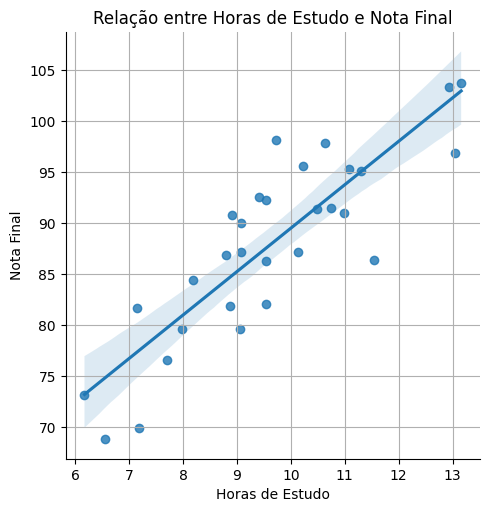

In [4]:
#codigo

import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

**Explicação:** A linha de tendência mostra uma inclinação positiva, indicando uma relação positiva entre as variáveis. Com isso, quanto mais horas de estudo, a tendência é de aumentar a nota final.

O gráfico foi plotado com a biblioteca seaborn e matplotlib.pyplot.

## (1.3) Interpretação


- O valor da correlação está mais próximo de 0, +1 ou -1? O que isso indica?
- A covariância obtida é positiva ou negativa? O que isso significa no contexto?
- Se a unidade da nota fosse alterada (ex: de 0-100 parqa 0-10), o valor da correlação mudaria? E a covariância?

**Respostas:**

O valor da correlação está mais próximo de +1, indicando uma correlação positiva entre as variáveis. Com isso, quando temos mais horas de estudo, temos notas finais maiores.

A covariância obtida é positiva. Nesse contexto, isso signifca que as variáveis tendem a variar na mesma direção. Se temos mais horas de estudo, temos maiores notas. Se temos menos horas, temos menores notas.

Se a unidade fosse alterada o valor da correlação não mudaria, pois a correlação de Pearson é adimensional e invariante a mudanças lineares de escala. Se mudarmos de 0-100 para 0-10, há uma preservação de direção da relação entre as variáveis, por exemplo. Quanto a covariância, teríamos uma mudança porque ela depende das unidades de medida.

## (1.4) Outras simulações

- Gere um novo conjunto de dados em que a correlação entre horas_estudo e nota_final seja próxima de zero;
- Gere um conjunto com correlação negativa entre as variáveis.

In [8]:
#codigo

#simulacao de dados com correlacao prox de zero
np.random.seed(42)
horas_estudo_zero = np.random.normal(10, 2, 30)
nota_final_zero = np.random.normal(80, 10, 30) 

#correlacao
correl_zero = np.corrcoef(horas_estudo_zero, nota_final_zero)[0, 1]
print(f"Correlação próxima de zero: {correl_zero:.4f}")


Correlação próxima de zero: 0.0988


**Explicação:** Para gerar uma correlação próxima de 0, os números de nota_final_zero foram alterados de modo que 